In [ ]:
%pip install --upgrade pip
%pip install pandas; numpy; matplotlib; datetime; math

Note: you may need to restart the kernel to use updated packages.
  Using cached DateTime-5.5-py3-none-any.whl.metadata (33 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot
import datetime
import math
import time

In [3]:
# Transition matrix for winter
Pww_winter = 0.78
Pdd_winter = 0.24
Pwd_winter = 1 - Pww_winter
Pdw_winter = 1 - Pdd_winter

# Transition matrix for summer
Pww_summer = 0.7
Pdd_summer = 0.49
Pwd_summer = 1 - Pww_summer
Pdw_summer = 1 - Pdd_summer

# Transition matrix for spring
Pww_spring = 0.73
Pdd_spring = 0.46
Pwd_spring = 1 - Pww_spring
Pdw_spring = 1 - Pdd_spring

# Transition matrix for autumn
Pww_autumn = 0.75
Pdd_autumn = 0.32
Pwd_autumn = 1 - Pww_autumn
Pdw_wautumn = 1 - Pdd_autumn

#Pwet values
Pwet_spring = 0.58
Pwet_summer = 0.56
Pwet_autumn = 0.63
Pwet_winter = 0.68


# Initialise the best score
best_score = 1


# Date parameters
start_date = "2025-01-01"  # Format: YYYY-MM-DD
number_of_days = 27393

# Initialise baseline mean rainfall values
baseline_mean_rainfall_spring = 2.8
baseline_mean_rainfall_summer = 3.7
baseline_mean_rainfall_autumn = 3.3
baseline_mean_rainfall_winter = 2.5

#Create list of year values
year_values = [
        "2020-2029",
        "2030-2039",
        "2040-2049",
        "2050-2059",
        "2060-2069",
        "2070-2079",
        "2080-2089",
        "2090-2099",
    ]

#Create list of season names
season_values = ["Spring", "Summer", "Autumn", "Winter"]

#Current projection: RCP6, 10th

# Define combinations of season and year range for Lambda Values
lambda_values_mapping = {
    ("Spring", "2020-2029"): 1 / (baseline_mean_rainfall_spring * 1.125),
    ("Summer", "2020-2029"): 1 / (baseline_mean_rainfall_summer * 1.155),
    ("Autumn", "2020-2029"): 1 / (baseline_mean_rainfall_autumn * 1.150),
    ("Winter", "2020-2029"): 1 / (baseline_mean_rainfall_winter * 1.125),
    ("Spring", "2030-2039"): 1 / (baseline_mean_rainfall_spring * 1.129),
    ("Summer", "2030-2039"): 1 / (baseline_mean_rainfall_summer * 1.155),
    ("Autumn", "2030-2039"): 1 / (baseline_mean_rainfall_autumn * 1.155),
    ("Winter", "2030-2039"): 1 / (baseline_mean_rainfall_winter * 1.135),
    ("Spring", "2040-2049"): 1 / (baseline_mean_rainfall_spring * 1.116),
    ("Summer", "2040-2049"): 1 / (baseline_mean_rainfall_summer * 1.115),
    ("Autumn", "2040-2049"): 1 / (baseline_mean_rainfall_autumn * 1.139),
    ("Winter", "2040-2049"): 1 / (baseline_mean_rainfall_winter * 1.145),
    ("Spring", "2050-2059"): 1 / (baseline_mean_rainfall_spring * 1.107),
    ("Summer", "2050-2059"): 1 / (baseline_mean_rainfall_summer * 1.080),
    ("Autumn", "2050-2059"): 1 / (baseline_mean_rainfall_autumn * 1.129),
    ("Winter", "2050-2059"): 1 / (baseline_mean_rainfall_winter * 1.160),
    ("Spring", "2060-2069"): 1 / (baseline_mean_rainfall_spring * 1.109),
    ("Summer", "2060-2069"): 1 / (baseline_mean_rainfall_summer * 1.065),
    ("Autumn", "2060-2069"): 1 / (baseline_mean_rainfall_autumn * 1.131),
    ("Winter", "2060-2069"): 1 / (baseline_mean_rainfall_winter * 1.180),
    ("Spring", "2070-2079"): 1 / (baseline_mean_rainfall_spring * 1.107),
    ("Summer", "2070-2079"): 1 / (baseline_mean_rainfall_summer * 1.030),
    ("Autumn", "2070-2079"): 1 / (baseline_mean_rainfall_autumn * 1.129),
    ("Winter", "2070-2079"): 1 / (baseline_mean_rainfall_winter * 1.210),
    ("Spring", "2080-2089"): 1 / (baseline_mean_rainfall_spring * 1.116),
    ("Summer", "2080-2089"): 1 / (baseline_mean_rainfall_summer * 1.005),
    ("Autumn", "2080-2089"): 1 / (baseline_mean_rainfall_autumn * 1.139),
    ("Winter", "2080-2089"): 1 / (baseline_mean_rainfall_winter * 1.255),
    ("Spring", "2090-2099"): 1 / (baseline_mean_rainfall_spring * 1.125),
    ("Summer", "2090-2099"): 1 / (baseline_mean_rainfall_summer * 1.000),
    ("Autumn", "2090-2099"): 1 / (baseline_mean_rainfall_autumn * 1.150),
    ("Winter", "2090-2099"): 1 / (baseline_mean_rainfall_winter * 1.280),
}

# Define combinations of season and year range for mean rainfall Values
meanrain_values_mapping = {
    ("Spring", "2020-2029"): (baseline_mean_rainfall_spring * 1.125),
    ("Summer", "2020-2029"): (baseline_mean_rainfall_summer * 1.155),
    ("Autumn", "2020-2029"): (baseline_mean_rainfall_autumn * 1.150),
    ("Winter", "2020-2029"): (baseline_mean_rainfall_winter * 1.125),
    ("Spring", "2030-2039"): (baseline_mean_rainfall_spring * 1.129),
    ("Summer", "2030-2039"): (baseline_mean_rainfall_summer * 1.155),
    ("Autumn", "2030-2039"): (baseline_mean_rainfall_autumn * 1.155),
    ("Winter", "2030-2039"): (baseline_mean_rainfall_winter * 1.135),
    ("Spring", "2040-2049"): (baseline_mean_rainfall_spring * 1.116),
    ("Summer", "2040-2049"): (baseline_mean_rainfall_summer * 1.115),
    ("Autumn", "2040-2049"): (baseline_mean_rainfall_autumn * 1.139),
    ("Winter", "2040-2049"): (baseline_mean_rainfall_winter * 1.145),
    ("Spring", "2050-2059"): (baseline_mean_rainfall_spring * 1.107),
    ("Summer", "2050-2059"): (baseline_mean_rainfall_summer * 1.080),
    ("Autumn", "2050-2059"): (baseline_mean_rainfall_autumn * 1.129),
    ("Winter", "2050-2059"): (baseline_mean_rainfall_winter * 1.160),
    ("Spring", "2060-2069"): (baseline_mean_rainfall_spring * 1.109),
    ("Summer", "2060-2069"): (baseline_mean_rainfall_summer * 1.065),
    ("Autumn", "2060-2069"): (baseline_mean_rainfall_autumn * 1.131),
    ("Winter", "2060-2069"): (baseline_mean_rainfall_winter * 1.180),
    ("Spring", "2070-2079"): (baseline_mean_rainfall_spring * 1.107),
    ("Summer", "2070-2079"): (baseline_mean_rainfall_summer * 1.030),
    ("Autumn", "2070-2079"): (baseline_mean_rainfall_autumn * 1.129),
    ("Winter", "2070-2079"): (baseline_mean_rainfall_winter * 1.210),
    ("Spring", "2080-2089"): (baseline_mean_rainfall_spring * 1.116),
    ("Summer", "2080-2089"): (baseline_mean_rainfall_summer * 1.005),
    ("Autumn", "2080-2089"): (baseline_mean_rainfall_autumn * 1.139),
    ("Winter", "2080-2089"): (baseline_mean_rainfall_winter * 1.255),
    ("Spring", "2090-2099"): (baseline_mean_rainfall_spring * 1.125),
    ("Summer", "2090-2099"): (baseline_mean_rainfall_summer * 1.000),
    ("Autumn", "2090-2099"): (baseline_mean_rainfall_autumn * 1.150),
    ("Winter", "2090-2099"): (baseline_mean_rainfall_winter * 1.280),
}

# Define combinations of season and year range for pwet Values
Pwet_values_mapping = {
    ("Spring", "2020-2029"): Pwet_spring,
    ("Summer", "2020-2029"): Pwet_summer,
    ("Autumn", "2020-2029"): Pwet_autumn,
    ("Winter", "2020-2029"): Pwet_winter,
    ("Spring", "2030-2039"): Pwet_spring,
    ("Summer", "2030-2039"): Pwet_summer,
    ("Autumn", "2030-2039"): Pwet_autumn,
    ("Winter", "2030-2039"): Pwet_winter,
    ("Spring", "2040-2049"): Pwet_spring,
    ("Summer", "2040-2049"): Pwet_summer,
    ("Autumn", "2040-2049"): Pwet_autumn,
    ("Winter", "2040-2049"): Pwet_winter,
    ("Spring", "2050-2059"): Pwet_spring,
    ("Summer", "2050-2059"): Pwet_summer,
    ("Autumn", "2050-2059"): Pwet_autumn,
    ("Winter", "2050-2059"): Pwet_winter,
    ("Spring", "2060-2069"): Pwet_spring,
    ("Summer", "2060-2069"): Pwet_summer,
    ("Autumn", "2060-2069"): Pwet_autumn,
    ("Winter", "2060-2069"): Pwet_winter,
    ("Spring", "2070-2079"): Pwet_spring,
    ("Summer", "2070-2079"): Pwet_summer,
    ("Autumn", "2070-2079"): Pwet_autumn,
    ("Winter", "2070-2079"): Pwet_winter,
    ("Spring", "2080-2089"): Pwet_spring,
    ("Summer", "2080-2089"): Pwet_summer,
    ("Autumn", "2080-2089"): Pwet_autumn,
    ("Winter", "2080-2089"): Pwet_winter,
    ("Spring", "2090-2099"): Pwet_spring,
    ("Summer", "2090-2099"): Pwet_summer,
    ("Autumn", "2090-2099"): Pwet_autumn,
    ("Winter", "2090-2099"): Pwet_winter,
}

# Define combinations of season and year range for pww Values
Pww_values_mapping = {
    ("Spring", "2020-2029"): Pww_spring,
    ("Summer", "2020-2029"): Pww_summer,
    ("Autumn", "2020-2029"): Pww_autumn,
    ("Winter", "2020-2029"): Pww_winter,
    ("Spring", "2030-2039"): Pww_spring,
    ("Summer", "2030-2039"): Pww_summer,
    ("Autumn", "2030-2039"): Pww_autumn,
    ("Winter", "2030-2039"): Pww_winter,
    ("Spring", "2040-2049"): Pww_spring,
    ("Summer", "2040-2049"): Pww_summer,
    ("Autumn", "2040-2049"): Pww_autumn,
    ("Winter", "2040-2049"): Pww_winter,
    ("Spring", "2050-2059"): Pww_spring,
    ("Summer", "2050-2059"): Pww_summer,
    ("Autumn", "2050-2059"): Pww_autumn,
    ("Winter", "2050-2059"): Pww_winter,
    ("Spring", "2060-2069"): Pww_spring,
    ("Summer", "2060-2069"): Pww_summer,
    ("Autumn", "2060-2069"): Pww_autumn,
    ("Winter", "2060-2069"): Pww_winter,
    ("Spring", "2070-2079"): Pww_spring,
    ("Summer", "2070-2079"): Pww_summer,
    ("Autumn", "2070-2079"): Pww_autumn,
    ("Winter", "2070-2079"): Pww_winter,
    ("Spring", "2080-2089"): Pww_spring,
    ("Summer", "2080-2089"): Pww_summer,
    ("Autumn", "2080-2089"): Pww_autumn,
    ("Winter", "2080-2089"): Pww_winter,
    ("Spring", "2090-2099"): Pww_spring,
    ("Summer", "2090-2099"): Pww_summer,
    ("Autumn", "2090-2099"): Pww_autumn,
    ("Winter", "2090-2099"): Pww_winter,
}

# Define combinations of season and year range for pdd Values
Pdd_values_mapping = {
    ("Spring", "2020-2029"): Pdd_spring,
    ("Summer", "2020-2029"): Pdd_summer,
    ("Autumn", "2020-2029"): Pdd_autumn,
    ("Winter", "2020-2029"): Pdd_winter,
    ("Spring", "2030-2039"): Pdd_spring,
    ("Summer", "2030-2039"): Pdd_summer,
    ("Autumn", "2030-2039"): Pdd_autumn,
    ("Winter", "2030-2039"): Pdd_winter,
    ("Spring", "2040-2049"): Pdd_spring,
    ("Summer", "2040-2049"): Pdd_summer,
    ("Autumn", "2040-2049"): Pdd_autumn,
    ("Winter", "2040-2049"): Pdd_winter,
    ("Spring", "2050-2059"): Pdd_spring,
    ("Summer", "2050-2059"): Pdd_summer,
    ("Autumn", "2050-2059"): Pdd_autumn,
    ("Winter", "2050-2059"): Pdd_winter,
    ("Spring", "2060-2069"): Pdd_spring,
    ("Summer", "2060-2069"): Pdd_summer,
    ("Autumn", "2060-2069"): Pdd_autumn,
    ("Winter", "2060-2069"): Pdd_winter,
    ("Spring", "2070-2079"): Pdd_spring,
    ("Summer", "2070-2079"): Pdd_summer,
    ("Autumn", "2070-2079"): Pdd_autumn,
    ("Winter", "2070-2079"): Pdd_winter,
    ("Spring", "2080-2089"): Pdd_spring,
    ("Summer", "2080-2089"): Pdd_summer,
    ("Autumn", "2080-2089"): Pdd_autumn,
    ("Winter", "2080-2089"): Pdd_winter,
    ("Spring", "2090-2099"): Pdd_spring,
    ("Summer", "2090-2099"): Pdd_summer,
    ("Autumn", "2090-2099"): Pdd_autumn,
    ("Winter", "2090-2099"): Pdd_winter,
}

# Define combinations of year range and mean annual rainfall 
anrain_mapping_values = {
        "2020-2029": 781,
        "2030-2039": 785,
        "2040-2049": 774,
        "2050-2059": 766,
        "2060-2069": 767,
        "2070-2079": 764,
        "2080-2089": 770,
        "2090-2099": 777,
}

# Define combinations of year range and max rainfall
maxrain_mapping_values = {
        "2020-2029": 91.2,
        "2030-2039": 91.3,
        "2040-2049": 90.5,
        "2050-2059": 91.6,
        "2060-2069": 93.2,
        "2070-2079": 95.6,
        "2080-2089": 99.1,
        "2090-2099": 101.1,
}


# Create a multi-index mapping key (Season, Year Interval)
keys = list(lambda_values_mapping.keys())
l_values = list(lambda_values_mapping.values())
Pww_values = list(Pww_values_mapping.values())
Pdd_values = list(Pdd_values_mapping.values())


def create_template_df():
    # Creates list of dates from defined parameters above
    date_range = pd.date_range(start_date, periods=number_of_days, freq="D")

    model_df = date_range.to_frame(index=True, name="Date")
    model_df.set_index("Date", inplace=True)

    # Define seasons based on months
    season_conditions = [
        (model_df.index.month.isin([3, 4, 5])),  # Spring
        (model_df.index.month.isin([6, 7, 8])),  # Summer
        (model_df.index.month.isin([9, 10, 11])),  # Autumn
        (model_df.index.month.isin([12, 1, 2])),  # Winter
    ]
    season_values = ["Spring", "Summer", "Autumn", "Winter"]
    #print(season_conditions, season_values)

    # Add a 'Season' column to `model`
    model_df["Season"] = np.select(season_conditions, season_values)

    # Define updated year ranges based on the index year
    year_conditions = [
        (2020 <= model_df.index.year) & (model_df.index.year <= 2029),
        (2030 <= model_df.index.year) & (model_df.index.year <= 2039),
        (2040 <= model_df.index.year) & (model_df.index.year <= 2049),
        (2050 <= model_df.index.year) & (model_df.index.year <= 2059),
        (2060 <= model_df.index.year) & (model_df.index.year <= 2069),
        (2070 <= model_df.index.year) & (model_df.index.year <= 2079),
        (2080 <= model_df.index.year) & (model_df.index.year <= 2089),
        (2090 <= model_df.index.year) & (model_df.index.year <= 2099),
    ]
    

    # Add a 'Year_Interval' column to `model`
    model_df["Year Interval"] = np.select(year_conditions, year_values)

    # Vectorized assignment of Lambda Values in `model`
    model_df["Lambda Values"] = np.nan  # Initialize with NaN
    for i, key in enumerate(keys):
        season, year_interval = key
        mask = (model_df["Season"] == season) & (model_df["Year Interval"] == year_interval)
        model_df.loc[mask, "Lambda Values"] = l_values[i]
        model_df.loc[mask, "Pww"] = Pww_values[i]
        model_df.loc[mask, "Pdw"] = 1 - Pdd_values[i]

    return(model_df)

# Create model dataframe from defined function
model_df = create_template_df()

# Displays model dataframe
model_df


,Season,Year Interval,Lambda Values,Pww,Pdw
Date,,,,,
2025-01-01,Winter,2020-2029,0.355556,0.78,0.76
2025-01-02,Winter,2020-2029,0.355556,0.78,0.76
2025-01-03,Winter,2020-2029,0.355556,0.78,0.76
2025-01-04,Winter,2020-2029,0.355556,0.78,0.76
2025-01-05,Winter,2020-2029,0.355556,0.78,0.76
...,...,...,...,...,...
2099-12-27,Winter,2090-2099,0.312500,0.78,0.76
2099-12-28,Winter,2090-2099,0.312500,0.78,0.76
2099-12-29,Winter,2090-2099,0.312500,0.78,0.76


In [8]:
# Below code is poorly commented because I cba
N = 100
i = 0
# Define code below this point as a function, produce output params to check against actual values, run for N times and save best model

for i in range(N):

    print(f"Current best average to beat: {best_score}")
    init_time = time.time()

    model_df2 = model_df.copy(deep=True)
    model_df2["Random Number"] = np.random.random(size=len(model_df2))

    model_df2["State"] = None
    model_df2["Amount"] = None

    prev_number = 1
    for index, row in model_df2.iterrows():
        if prev_number == 1:
            if row["Random Number"] < row["Pww"]:
                model_df2.at[index, "State"] = prev_number = 1
                model_df2.at[index, "Amount"] = -math.log(1 - (np.random.random())) / (row["Lambda Values"])
            else:
                model_df2.at[index, "State"] = prev_number = 0
                model_df2.at[index, "Amount"] = 0
        else: 
            if row["Random Number"] < row["Pdw"]:
                model_df2.at[index, "State"] = prev_number = 1 
                model_df2.at[index, "Amount"] = -math.log(1 - (np.random.random())) / (row["Lambda Values"])
            else: 
                model_df2.at[index, "State"] = prev_number = 0
                model_df2.at[index, "Amount"] = 0

    model_df2['Shifted State'] = model_df2['State'].shift(-1)
    
    for index, row in model_df2.iterrows():
            if row["State"] == 1 and row["Shifted State"] == 1:
                model_df2.at[index, "Pww_state"] = 1
                model_df2.at[index, "Pdd_state"] = 0
            elif row["State"] == 0 and row["Shifted State"] == 0:
                model_df2.at[index, "Pdd_state"] = 1
                model_df2.at[index, "Pww_state"] = 0
            else:
                model_df2.at[index, "Pww_state"] = 0
                model_df2.at[index, "Pdd_state"] = 0
        
    maxrain_results_dict = {}
    anrain_results_dict = {}
    pwet_results_dict = {}
    meanrain_results_dict = {}
    pww_results_dict = {}
    pdd_results_dict = {}

    for i in year_values:
        snipet1 = model_df2.loc[model_df2["Year Interval"] == i]
        decade_maxrain = abs(1 - (snipet1["Amount"].max() / maxrain_mapping_values[i]))
        decade_anrain = abs(1 - ((snipet1["Amount"].sum() / (len(snipet1)/365.25)) / anrain_mapping_values[i]))
        temp_string = f"{i}_max_rain"
        temp_string2 = f"{i}_ann_rain"
        maxrain_results_dict[temp_string] = decade_maxrain
        anrain_results_dict[temp_string2] = decade_anrain
        for j in season_values:
            #print(Pdd_values_mapping[(j,i)])
            snipet2 = snipet1.loc[snipet1['Season'] == j]
            season_pwet = (snipet2["State"].sum() / len(snipet2))
            season_pwet_stat = abs(1 - ((snipet2["State"].sum() / len(snipet2)) / Pwet_values_mapping[(j,i)]))
            season_meanrain = abs(1 - ((snipet2["Amount"].mean() / season_pwet) / meanrain_values_mapping[(j,i)]))
            season_pww = abs(1 - ((snipet2["Pww_state"].sum() / snipet2["State"].sum()) / Pww_values_mapping[(j,i)]))
            season_pdd = abs(1 - ((snipet2["Pdd_state"].sum() / (len(snipet2) - snipet2["State"].sum())) / (Pdd_values_mapping[(j,i)])))
            temp_string3 = f"{i}_{j}_season_pwet"
            temp_string4 = f"{i}_{j}_season_mean_rain"
            temp_string5 = f"{i}_{j}_season_pww"
            temp_string6 = f"{i}_{j}_season_pdd"
            pwet_results_dict[temp_string3] = season_pwet_stat
            meanrain_results_dict[temp_string4] = season_meanrain
            pww_results_dict[temp_string5] = season_pww
            pdd_results_dict[temp_string6] = season_pdd

    print(sum(maxrain_results_dict.values())/len(maxrain_results_dict))
    print(sum(anrain_results_dict.values())/len(anrain_results_dict))
    print(sum(pwet_results_dict.values())/len(pwet_results_dict))
    print(sum(meanrain_results_dict.values())/len(meanrain_results_dict))
    print(sum(pww_results_dict.values())/len(pww_results_dict))
    print(sum(pdd_results_dict.values())/len(pdd_results_dict))

    current_score = (((sum(maxrain_results_dict.values())/len(maxrain_results_dict))/10) + (sum(anrain_results_dict.values())/len(anrain_results_dict)) + (sum(pwet_results_dict.values())/len(pwet_results_dict)) + (sum(meanrain_results_dict.values())/len(meanrain_results_dict)) + (sum(pww_results_dict.values())/len(pww_results_dict))) / 5

    if current_score<best_score:
        best_it = model_df2.copy(deep=True)
        best_score = current_score
    else:
        None


best_it
    

Current best average to beat: 0.07374217281198128
0.6699222864232193
0.13491816829599249
0.13709744241939392
0.030757952400035742
0.016299794114832084
0.06682802638736293
Current best average to beat: 0.07374217281198128
0.691666586692297
0.12449495610700775
0.14125473083662127
0.03346326687615893
0.020201122862534882
0.08859933446500581
Current best average to beat: 0.07374217281198128
0.6822917279339391
0.14982745132344877
0.14760708894837718
0.02789407494895301
0.019905148951444514
0.06150860956458663
Current best average to beat: 0.07374217281198128
0.6694477804729213
0.13735918074959688
0.12867205389173858
0.026489142724533225
0.0238297492276602
0.0701126478145106
Current best average to beat: 0.07374217281198128
0.6656865040867169
0.13756321573451014
0.14117851102489967
0.030024466202382374
0.01504477453906956
0.07076358199528866
Current best average to beat: 0.07374217281198128
0.7111813184810694
0.14379110309710422
0.14052422506303658
0.03323254975513752
0.01827899254293354
0.0

,Season,Year Interval,Lambda Values,Pww,Pdw,Random Number,State,Amount,Shifted State,Pww_state,Pdd_state
Date,,,,,,,,,,,
2025-01-01,Winter,2020-2029,0.355556,0.78,0.76,0.317151,1,0.066781,1,1.0,0.0
2025-01-02,Winter,2020-2029,0.355556,0.78,0.76,0.393500,1,2.609644,1,1.0,0.0
2025-01-03,Winter,2020-2029,0.355556,0.78,0.76,0.321298,1,0.378507,1,1.0,0.0
2025-01-04,Winter,2020-2029,0.355556,0.78,0.76,0.361296,1,23.842416,1,1.0,0.0
2025-01-05,Winter,2020-2029,0.355556,0.78,0.76,0.160745,1,2.364699,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2099-12-27,Winter,2090-2099,0.312500,0.78,0.76,0.352933,1,0.901811,1,1.0,0.0
2099-12-28,Winter,2090-2099,0.312500,0.78,0.76,0.122615,1,0.225275,0,0.0,0.0
2099-12-29,Winter,2090-2099,0.312500,0.78,0.76,0.812420,0,0,1,0.0,0.0


<BarContainer object of 27393 artists>

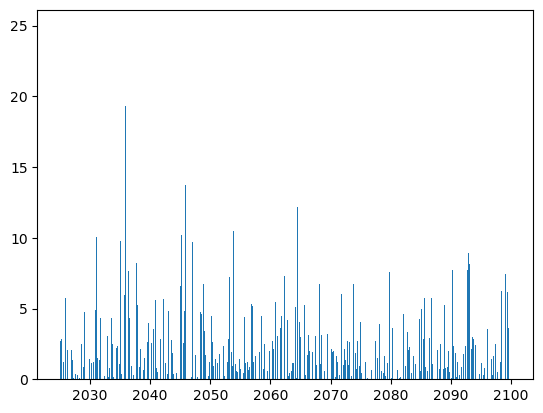

In [4]:
#Plots best_it dataframe
mpl.pyplot.bar(x=best_it.index, height=best_it['Amount'])

In [9]:
#Creates csv with time series of the best model
best_it.to_csv('rcp690thtimeseries2.csv',columns=['Amount'])